# The goal of the project

The project is aimed to determine if two products are the same by their images and titles.

We thought about approaching this problem as a clustering problem, so that we could handle unseen data (match new products). We can do it once via NLP (titles), and second via computer vision (images), and then possibly combine the two.

# Loading and exploring the data

In [1]:
import pandas as pd
df = pd.read_csv('/Users/royyanovski/Desktop/DS Project - Product matching/train 2.csv')

In [2]:
df.shape

(34250, 5)

We have 34,250 products in our dataset.

In [3]:
df.head(10)

posting_id                                 image       image_phash  \
0   train_129225211  0000a68812bc7e98c42888dfb1c07da0.jpg  94974f937d4c2433   
1  train_3386243561  00039780dfc94d01db8676fe789ecd05.jpg  af3f9460c2838f0f   
2  train_2288590299  000a190fdd715a2a36faed16e2c65df7.jpg  b94cb00ed3e50f78   
3  train_2406599165  00117e4fc239b1b641ff08340b429633.jpg  8514fc58eafea283   
4  train_3369186413  00136d1cf4edede0203f32f05f660588.jpg  a6f319f924ad708c   
5  train_2464356923  0013e7355ffc5ff8fb1ccad3e42d92fe.jpg  bbd097a7870f4a50   
6  train_1802986387  00144a49c56599d45354a1c28104c039.jpg  f815c9bb833ab4c8   
7  train_1806152124  0014f61389cbaa687a58e38a97b6383d.jpg  eea7e1c0c04da33d   
8    train_86570404  0019a3c6755a194cb2e2c12bfc63972e.jpg  ea9af4f483249972   
9   train_831680791  001be52b2beec40ddc1d2d7fc7a68f08.jpg  e1ce953d1a70618f   

                                               title  label_group  
0                          Paper Bag Victoria Secret    249114794  
1  Double Tape 3M VHB 12 mm x 4,5 m ORIGINAL / DO...   2937985045  
2        Maling TTS Canned Pork Luncheon Meat 397 gr   2395904891  
3  Daster Batik Lengan pendek - Motif Acak / Camp...   4093212188  
4                  Nescafe \xc3\x89clair Latte 220ml   3648931069  
5  CELANA WANITA  (BB 45-84 KG)Harem wanita (bisa...   2660605217  
6                           Jubah anak size 1-12 thn   1835033137  
7  KULOT PLISKET SALUR /CANDY PLISKET /WISH KULOT...   1565741687  
8  [LOGU] Tempelan kulkas magnet angka, tempelan ...   2359912463  
9  BIG SALE SEPATU PANTOFEL KULIT KEREN KERJA KAN...   2630990665

# Exploring the labels

In [4]:
df['label_group'].nunique()

11014

In [5]:
df['label_group'].value_counts().max()

51

In [6]:
df['label_group'].value_counts().min()

2

In [7]:
df['label_group'].value_counts().mean()

3.109678590884329

We have 11,014 different classes. The largest class contains 51 samples and the smallest contains 2 samples. An average class contains around 3 samples.

In [8]:
class_sizes = []
for i in range(1, 52):
    count = sum(df['label_group'].value_counts() == i)
    class_sizes.append(count)

In [9]:
label_counts = [i for i in range(1, 52)]
class_counts_df = pd.DataFrame(list(zip(label_counts, class_sizes)), columns =['Label Count', 'NO. of classes'])

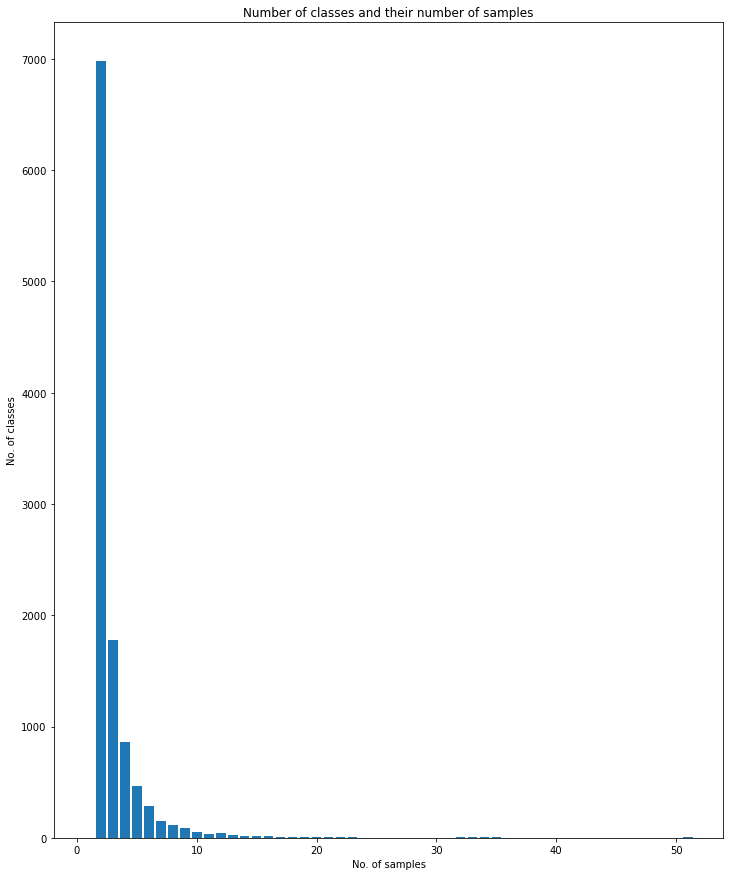

In [10]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(12,15))
plt.bar(class_counts_df['Label Count'], class_counts_df['NO. of classes'])
plt.title('Number of classes and their number of samples')
plt.ylabel('No. of classes')
plt.xlabel('No. of samples')
plt.show()

In [32]:
class_counts_df.loc[class_counts_df['Label Count'] > 10, 'NO. of classes'].sum()

233

Most of the classes (around 7,000) are of 2 samples, and the number of classes decrease as the number of samples increase. Only 233 classes have more than 10 samples.

# Exploring the images

In [11]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def plot_random_images(images_count):
    
    plot_list = df['image'].sample(n=images_count).tolist()
    size = np.sqrt(images_count)
    if int(size)*int(size) < images_count:
        size = int(size) + 1
        
    plt.figure(figsize=(20, 20))
    
    ind=0
    for image_id in plot_list:
        plt.subplot(size, size, ind + 1)
        image = cv2.imread(f'/Users/royyanovski/Desktop/DS Project - Product matching/train_images/{image_id}', )
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title(image_id, fontsize=12)
        plt.axis("off")
        ind+=1
    plt.show()

Plotting random images from the data set, to get a feel of how they look like:

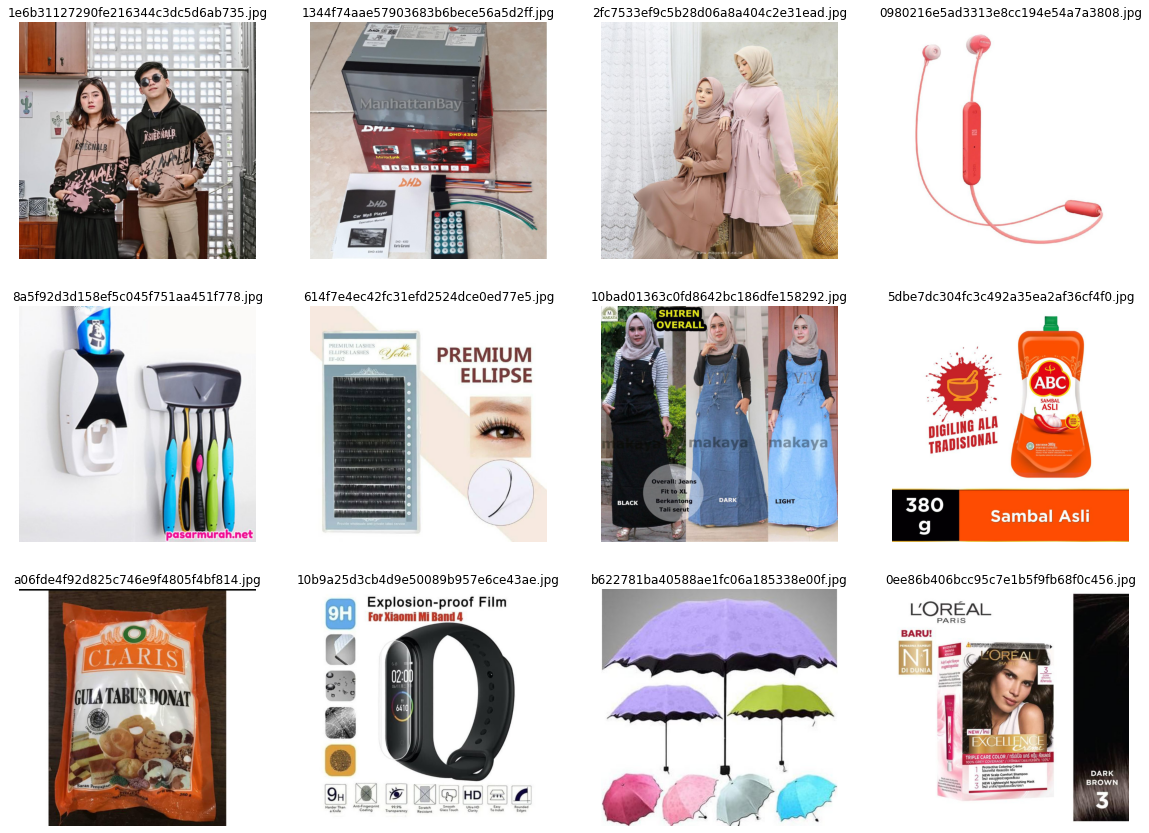

In [13]:
plot_random_images(12)

# Duplicates

In [14]:
for col in df.columns:
    print(col, df[col].nunique())

posting_id 34250
image 32412
image_phash 28735
title 33117
label_group 11014


In [15]:
print('\nNumber of duplicated rows: ',df[df.duplicated()].shape[0])


Number of duplicated rows:  0


We can see above that there are no duplicated rows but some rows use the same exact image / title.

In [17]:
print(df.isna().sum())

posting_id     0
image          0
image_phash    0
title          0
label_group    0
dtype: int64


There are no missing values as well.

## A deeper look into the identical images and titles

Title:
PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH BANGET
ID:
train_2496690777
Label:
509010932


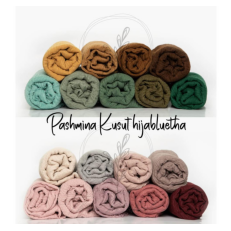

Title:
PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH BANGET PART 2
ID:
train_2771755203
Label:
509010932


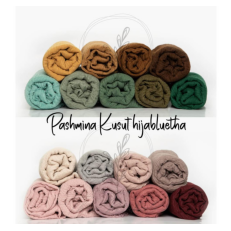

Title:
PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH BANGET PART 2
ID:
train_2771755203
Label:
509010932


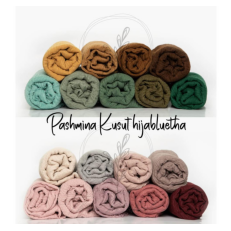

Title:
PASHMINA KUSUT RAWIS POLOS CRINKLE SHAWL MURAH BANGET
ID:
train_2496690777
Label:
509010932


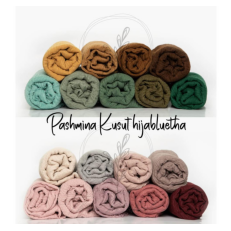

Title:
Pakaian Dalam Cewek Wings Bra  Bra Tempel Seamless  Push Up Bra  BH Wanita IMPORT
ID:
train_1572286671
Label:
532279668


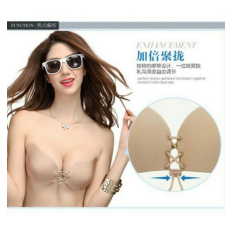

Title:
WINGs BRA-BRA TEMPEL SEAMLESS - PUSH UP BRA - STRAPLESS WING BRA - BRA TEMPEL - BH TEMPEL
ID:
train_3117535609
Label:
532279668


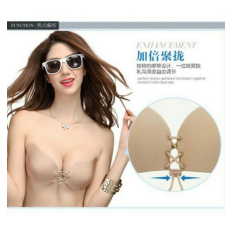

Title:
WINGs BRA-BRA TEMPEL SEAMLESS - PUSH UP BRA - STRAPLESS WING BRA - BRA TEMPEL - BH TEMPEL
ID:
train_3117535609
Label:
532279668


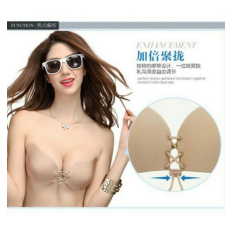

Title:
Pakaian Dalam Cewek Wings Bra  Bra Tempel Seamless  Push Up Bra  BH Wanita IMPORT
ID:
train_1572286671
Label:
532279668


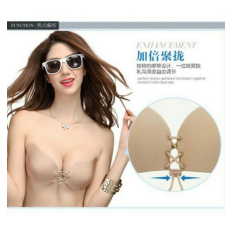

Title:
DZUVIA TUNIK / NEDA TUNIK
ID:
train_2281183509
Label:
1356633425


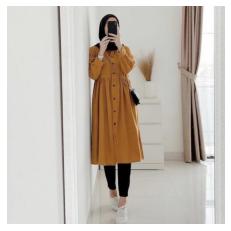

Title:
TUNIK DZUVIA KANCING HIDUP SYARI MOSCREPE PREMIUM
ID:
train_615566263
Label:
1356633425


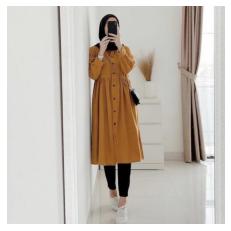

Title:
TUNIK DZUVIA KANCING HIDUP SYARI MOSCREPE PREMIUM
ID:
train_615566263
Label:
1356633425


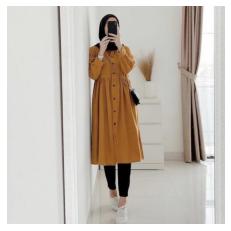

Title:
DZUVIA TUNIK / NEDA TUNIK
ID:
train_2281183509
Label:
1356633425


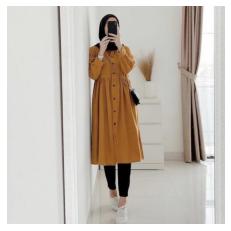

Title:
Packing Kardus Tambahan - Packing Ekstra Kardus - Packing Pengaman Agar Tidak Bocor
ID:
train_3663748113
Label:
215542278


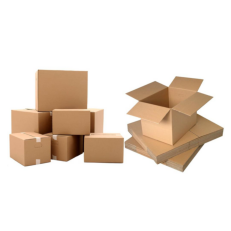

Title:
TAMBAHAN PACKING KARDUS/BUBBLEWRAP / Centralbandung
ID:
train_1398921910
Label:
215542278


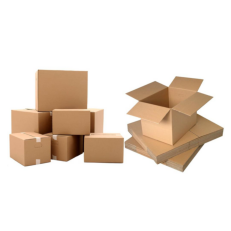

Title:
TAMBAHAN PACKING KARDUS/BUBBLEWRAP / Centralbandung
ID:
train_1398921910
Label:
215542278


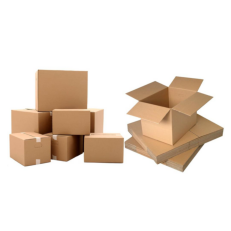

Title:
Packing Kardus Tambahan - Packing Ekstra Kardus - Packing Pengaman Agar Tidak Bocor
ID:
train_3663748113
Label:
215542278


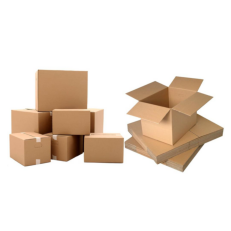

Title:
SABUN PEMUTIH TZUKI ORIGINAL PENGHILANG JERAWAT, ANTI AGING DAN FLEK HITAM
ID:
train_2856183961
Label:
3489985175


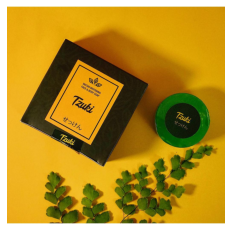

Title:
Tzuki Beauty Soap
ID:
train_1420726013
Label:
3489985175


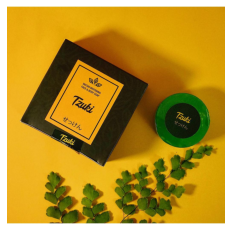

Title:
Tzuki Beauty Soap
ID:
train_1420726013
Label:
3489985175


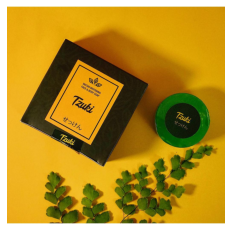

Title:
SABUN PEMUTIH TZUKI ORIGINAL PENGHILANG JERAWAT, ANTI AGING DAN FLEK HITAM
ID:
train_2856183961
Label:
3489985175


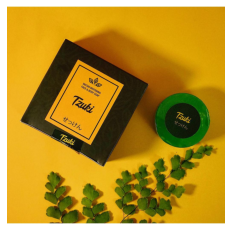

Title:
Gesper Ikat Pinggang Pria Canvas Army Military Tactical 125cm - MU056
ID:
train_1648915230
Label:
1037925737


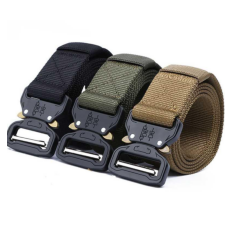

Title:
Miluota Tali Ikat Pinggang Canvas Army Military Tactical 125cm
ID:
train_2500339995
Label:
1037925737


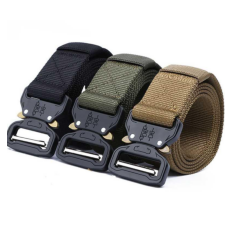

Title:
Miluota Tali Ikat Pinggang Canvas Army Military Tactical 125cm
ID:
train_2500339995
Label:
1037925737


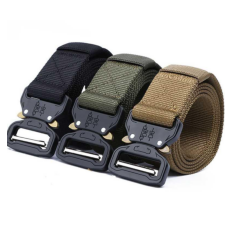

Title:
Gesper Ikat Pinggang Pria Canvas Army Military Tactical 125cm - MU056
ID:
train_1648915230
Label:
1037925737


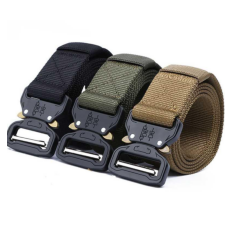

Title:
Miluota Tali Ikat Pinggang Canvas Army Military Tactical 125cm MU056
ID:
train_3977286900
Label:
1037925737


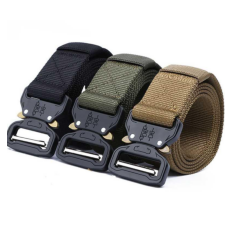

Title:
Gesper Ikat Pinggang Pria Canvas Army Military Tactical 125cm - MU056
ID:
train_1648915230
Label:
1037925737


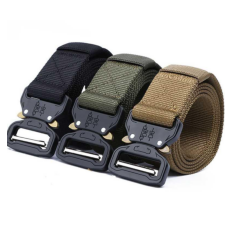

Title:
Tali Ikat Pinggang Pria Canvas Army Military Tactical 125cm
ID:
train_1641797816
Label:
1037925737


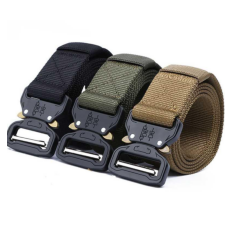

Title:
Gesper Ikat Pinggang Pria Canvas Army Military Tactical 125cm - MU056
ID:
train_1648915230
Label:
1037925737


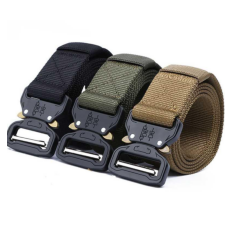

Title:
Aroma Terapi Pengharum Ruangan Merek Josmine / Aroma Pengharum Ruangan
ID:
train_3582623500
Label:
3411023097


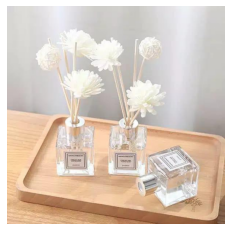

Title:
Reed Diffuser Aromatherapy Pengharum Ruangan Merek Josmine / Pengharum Ruangan Aroma Josmine
ID:
train_3476473016
Label:
3411023097


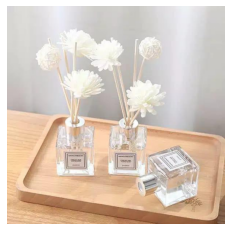

Title:
Reed Diffuser Aromatherapy Pengharum Ruangan Merek Josmine / Pengharum Ruangan Aroma Josmine
ID:
train_3476473016
Label:
3411023097


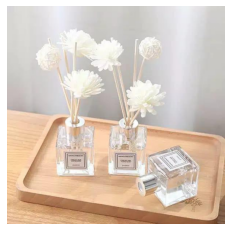

Title:
Aroma Terapi Pengharum Ruangan Merek Josmine / Aroma Pengharum Ruangan
ID:
train_3582623500
Label:
3411023097


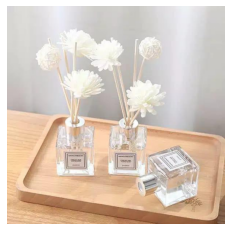

Title:
1KG = 7PCS | GEYSA PANTS / CELANA STRADI / CELANA SALUR SELEBGRAM
ID:
train_1901526598
Label:
372328414


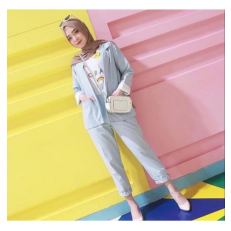

Title:
1KG BISA 7PCS | GEYSA PANTS / CELANA STRADI / CELANA SALUR SELEBGRAM
ID:
train_2348197943
Label:
372328414


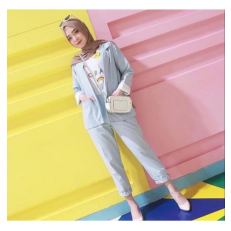

Title:
1KG BISA 7PCS | GEYSA PANTS / CELANA STRADI / CELANA SALUR SELEBGRAM
ID:
train_2348197943
Label:
372328414


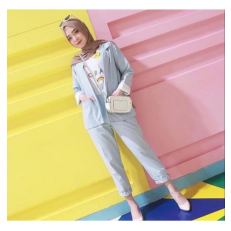

Title:
1KG = 7PCS | GEYSA PANTS / CELANA STRADI / CELANA SALUR SELEBGRAM
ID:
train_1901526598
Label:
372328414


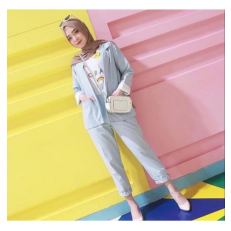

Title:
ALKOHOL SWAB ALKOHOLSWAB BOX
ID:
train_3249867868
Label:
420759736


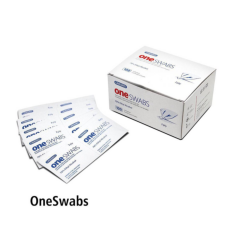

Title:
ALKOHOL SWAB PER BOX. TISUE ALKOHOL ANTI BAKTERI  steril kapas alkohol OneMed
ID:
train_468635764
Label:
420759736


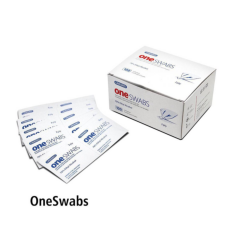

Title:
ALKOHOL SWAB PER BOX. TISUE ALKOHOL ANTI BAKTERI  steril kapas alkohol OneMed
ID:
train_468635764
Label:
420759736


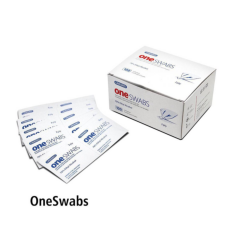

Title:
ALKOHOL SWAB ALKOHOLSWAB BOX
ID:
train_3249867868
Label:
420759736


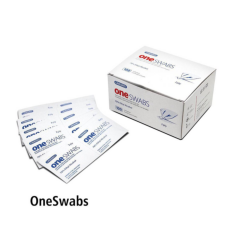

Title:
100% Cocoa Dark Chocolate Monggo 80g| Cokelat Hitam 100% Kakao| Coklat Diet | Cemilan Sehat | Keto
ID:
train_4000911558
Label:
4070348305


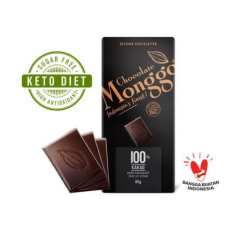

Title:
100% Cocoa Dark Chocolate Monggo 80g| Cokelat Hitam 100% Kakao| Coklat Makanan Diet Keto Indonesia
ID:
train_4231036206
Label:
4070348305


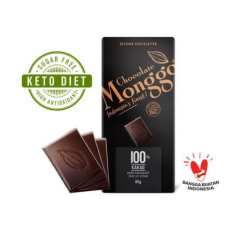

Title:
100% Cocoa Dark Chocolate Monggo 80g| Cokelat Hitam 100% Kakao| Coklat Makanan Diet Keto Indonesia
ID:
train_4231036206
Label:
4070348305


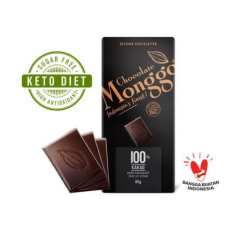

Title:
100% Cocoa Dark Chocolate Monggo 80g| Cokelat Hitam 100% Kakao| Coklat Diet | Cemilan Sehat | Keto
ID:
train_4000911558
Label:
4070348305


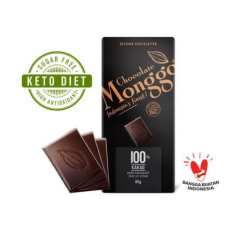

Title:
100% Cocoa Dark Unsweetened Chocolate Monggo 80g| Cokelat Hitam 100% Kakao| Coklat Premium Indonesia
ID:
train_3495901022
Label:
4070348305


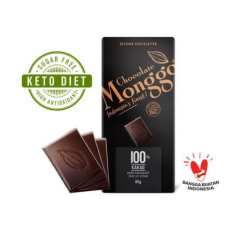

Title:
100% Cocoa Dark Chocolate Monggo 80g| Cokelat Hitam 100% Kakao| Coklat Diet | Cemilan Sehat | Keto
ID:
train_4000911558
Label:
4070348305


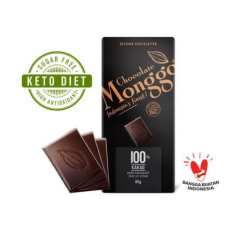

Title:
HLG HL WARNA GRADASI clip on 55cm hair clip warna highlight rambut palsu klip
ID:
train_3219378211
Label:
3048199336


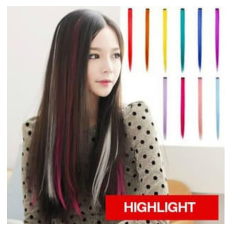

Title:
HLP hair clip WARNA POLOS highlight rambut palsu klip
ID:
train_315847490
Label:
3048199336


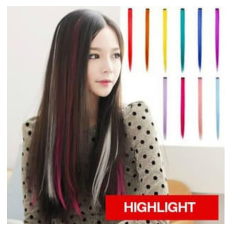

Title:
HLP hair clip WARNA POLOS highlight rambut palsu klip
ID:
train_315847490
Label:
3048199336


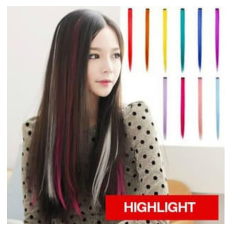

Title:
HLG HL WARNA GRADASI clip on 55cm hair clip warna highlight rambut palsu klip
ID:
train_3219378211
Label:
3048199336


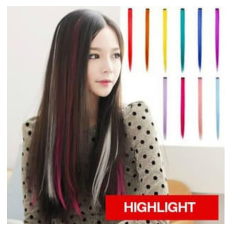

Title:
Murah Botol Minum Olahraga Sepeda 750ml - KS200334 Berkualitas
ID:
train_3014327143
Label:
3524864138


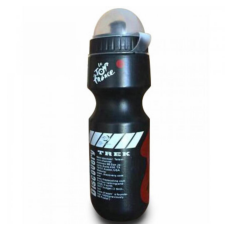

Title:
TaffSPORT TREK Botol Minum Olahraga Sepeda 750ml - 30A12
ID:
train_1072645845
Label:
3524864138


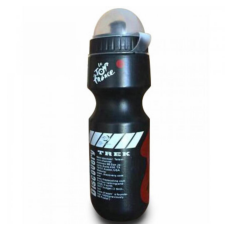

Title:
TaffSPORT TREK Botol Minum Olahraga Sepeda 750ml - 30A12
ID:
train_1072645845
Label:
3524864138


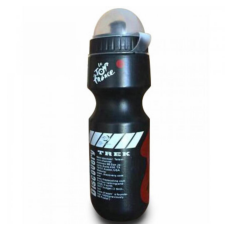

Title:
Murah Botol Minum Olahraga Sepeda 750ml - KS200334 Berkualitas
ID:
train_3014327143
Label:
3524864138


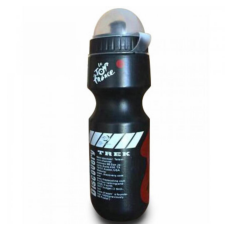

Title:
RAGAN Tatakan Alas Ram Hook Pajangan Display Segi Tempat Grosir Aksesoris Wanita Etnik
ID:
train_3731105045
Label:
1779307795


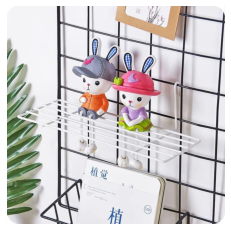

Title:
Tatakan Besi PUTIH - Rak Gantung Besi Aksesoris Mesh Wire Grid
ID:
train_1157521823
Label:
1779307795


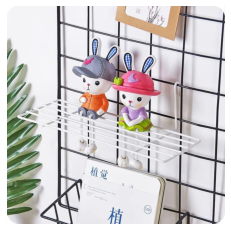

Title:
Tatakan Besi PUTIH - Rak Gantung Besi Aksesoris Mesh Wire Grid
ID:
train_1157521823
Label:
1779307795


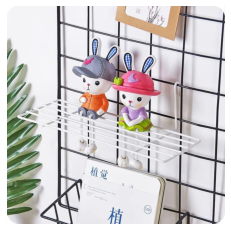

Title:
RAGAN Tatakan Alas Ram Hook Pajangan Display Segi Tempat Grosir Aksesoris Wanita Etnik
ID:
train_3731105045
Label:
1779307795


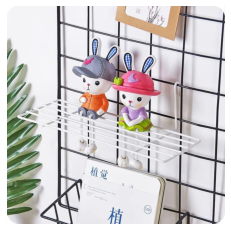

Title:
SOFTLENS NAVY LENS
ID:
train_2768994033
Label:
2625952212


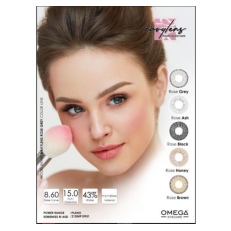

Title:
SOFTLENS NAVYLENS 15 MM by OMEGA EYECARE
ID:
train_296551336
Label:
2625952212


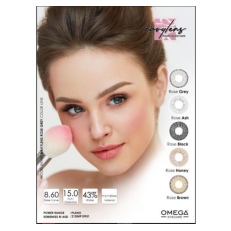

Title:
SOFTLENS NAVYLENS 15 MM by OMEGA EYECARE
ID:
train_296551336
Label:
2625952212


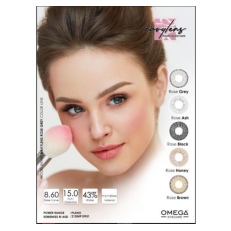

Title:
SOFTLENS NAVY LENS
ID:
train_2768994033
Label:
2625952212


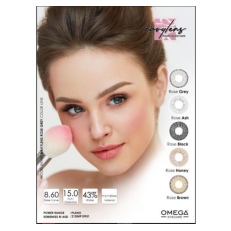

Title:
SUNLIGHT JERUK NIPIS 755ML MURAH
ID:
train_3163022380
Label:
2641446047


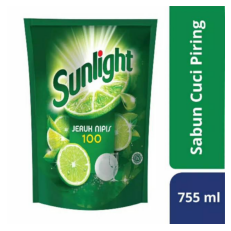

Title:
Sunlight Cairan Pencuci Piring Refill Jeruk Nipis 755ml | Sunlight Lime
ID:
train_2524415309
Label:
2641446047


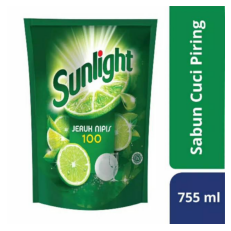

Title:
Sunlight Cairan Pencuci Piring Refill Jeruk Nipis 755ml | Sunlight Lime
ID:
train_2524415309
Label:
2641446047


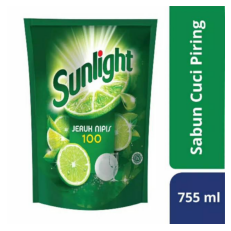

Title:
SUNLIGHT JERUK NIPIS 755ML MURAH
ID:
train_3163022380
Label:
2641446047


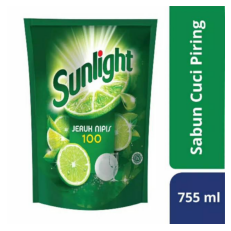

Title:
( ADA PACKINGAN )BABY TOOTH TEETHER / GIGITAN BAYI MODEL BUAH /BABY SILICONE TEETHER
ID:
train_2721604133
Label:
3326267479


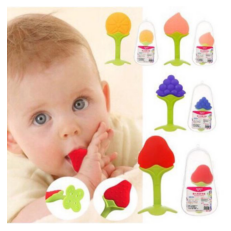

Title:
( Free Packing Box  )TEETHER BABY SILICONE FRUIT / GIGITAN BAYI MODEL BUAH /BABY SILICONE TEETHER
ID:
train_2152672329
Label:
3326267479


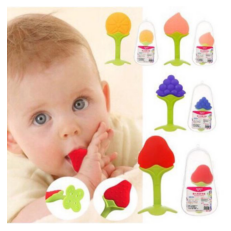

Title:
( Free Packing Box  )TEETHER BABY SILICONE FRUIT / GIGITAN BAYI MODEL BUAH /BABY SILICONE TEETHER
ID:
train_2152672329
Label:
3326267479


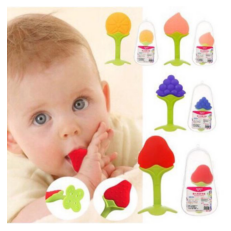

Title:
( ADA PACKINGAN )BABY TOOTH TEETHER / GIGITAN BAYI MODEL BUAH /BABY SILICONE TEETHER
ID:
train_2721604133
Label:
3326267479


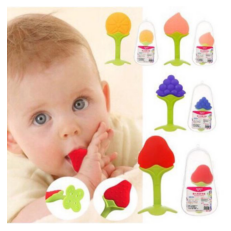

Title:
(Flash Sale) DNM Eyeliner Warna Tahan Lama Tahan Air Tidak Mekar Eye Liner
ID:
train_3741926471
Label:
1332051433


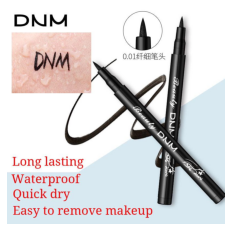

Title:
EYELINER DNM waterproof eyeliner pen pencil tahan lama hitam ORIGINAL TERMURAH
ID:
train_3371902733
Label:
1332051433


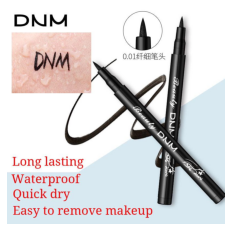

Title:
EYELINER DNM waterproof eyeliner pen pencil tahan lama hitam ORIGINAL TERMURAH
ID:
train_3371902733
Label:
1332051433


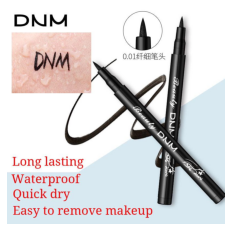

Title:
(Flash Sale) DNM Eyeliner Warna Tahan Lama Tahan Air Tidak Mekar Eye Liner
ID:
train_3741926471
Label:
1332051433


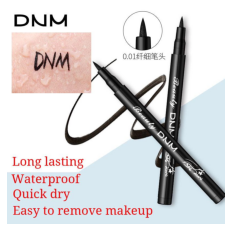

Title:
Madu Uray - Raw Honey 875gr (640 ml) - Madu Murni - Madu Hutan - Madu Asli Organik - Jagapati
ID:
train_4208920348
Label:
1674683146


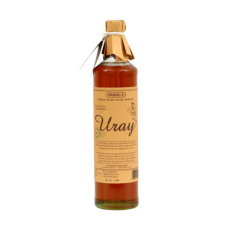

Title:
Madu Uray 640ml
ID:
train_2690347138
Label:
1674683146


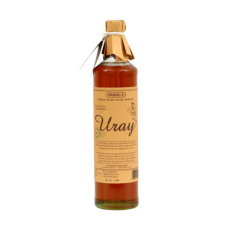

Title:
Madu Uray 640ml
ID:
train_2690347138
Label:
1674683146


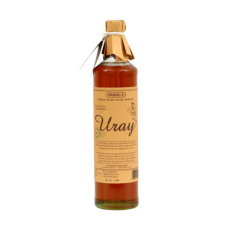

Title:
Madu Uray - Raw Honey 875gr (640 ml) - Madu Murni - Madu Hutan - Madu Asli Organik - Jagapati
ID:
train_4208920348
Label:
1674683146


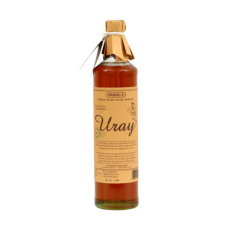

KeyboardInterrupt: 

In [18]:
import matplotlib.pyplot as plt
import cv2

for i, image in enumerate(df['image']):
    for j, image2 in enumerate(df['image']):
        if image == image2 and i != j:
            print('Title:')
            print(df.loc[i, 'title'])
            print('ID:')
            print(df.loc[i, 'posting_id'])
            print('Label:')
            print(df.loc[i, 'label_group'])
            print_image = cv2.imread(f'/Users/royyanovski/Desktop/DS Project - Product matching/train_images/{image}', )
            print_image = cv2.cvtColor(print_image, cv2.COLOR_BGR2RGB)
            plt.imshow(print_image)
            plt.axis("off")
            plt.show()
            print('Title:')
            print(df.loc[j, 'title'])
            print('ID:')
            print(df.loc[j, 'posting_id'])
            print('Label:')
            print(df.loc[j, 'label_group'])
            print_image2 = cv2.imread(f'/Users/royyanovski/Desktop/DS Project - Product matching/train_images/{image2}', )
            print_image2 = cv2.cvtColor(print_image2, cv2.COLOR_BGR2RGB)
            plt.imshow(print_image2)
            plt.axis("off")
            plt.show()
            break
            

Above we can see pairs of products that use the same image, some of the also have the same title but we can see that in most cases they have also the same labels so it shouldn't present us with any special difficulties.

In [19]:
def plot_group_images(group_id):
    
    plot_list = df[df['label_group'] == group_id]
    plot_list = plot_list['image'].tolist()
    images_count = len(plot_list)
    size = np.sqrt(images_count)
    if int(size)*int(size) < images_count:
        size = int(size) + 1
        
    plt.figure(figsize=(20, 20))
    
    ind=0
    for image_id in plot_list:
        plt.subplot(size, size, ind + 1)
        image = cv2.imread(f'/Users/royyanovski/Desktop/DS Project - Product matching/train_images/{image_id}', )
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        plt.imshow(image)
        plt.title(image_id, fontsize=6)
        plt.axis("off")
        ind+=1
    plt.show()
    
    sample = df[df['label_group'] == group_id]
    print(f'Total number of items in group {group_id}: {len(sample)}, number of unique titles: {sample.nunique()}')

Plot the images of a certain group. We can see that images with the same label can be very different from one another. This is something that our model will have to overcome.

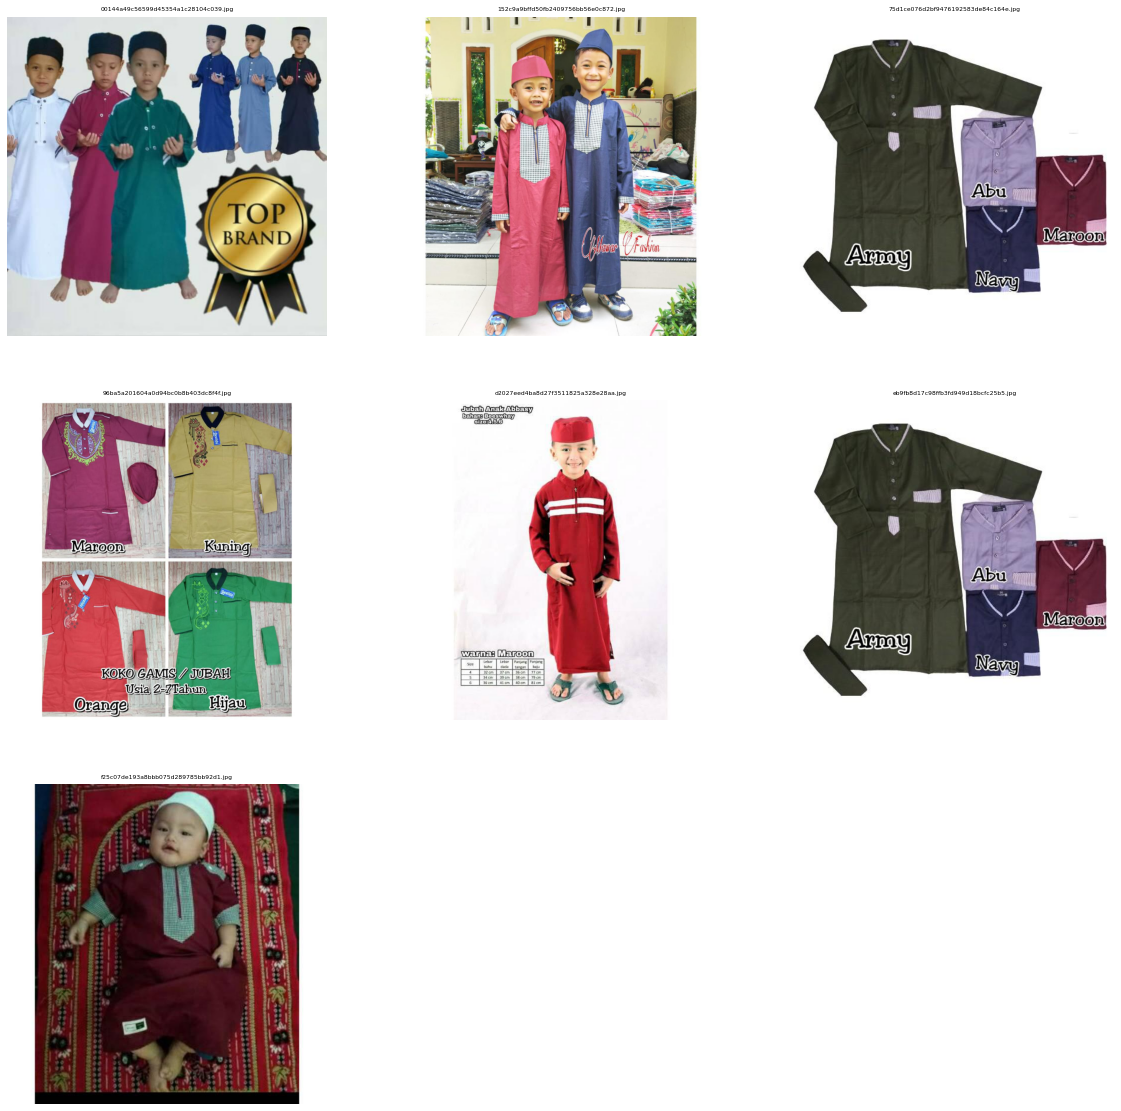

Total number of items in group 1835033137: 7, number of unique titles: posting_id     7
image          7
image_phash    6
title          7
label_group    1
dtype: int64


In [20]:
plot_group_images(1835033137)

Understanding the image formats:

In [25]:
from PIL import Image

image1 = Image.open('/Users/royyanovski/Desktop/DS Project - Product matching/train_images/' + df.loc[0, 'image'])

In [22]:
print(image1.format, image1.mode, image1.size)

JPEG RGB (1024, 1024)


In [23]:
from matplotlib import image
from matplotlib import pyplot

data = image.imread('/Users/royyanovski/Desktop/DS Project - Product matching/train_images/' + df.loc[0, 'image'])

In [24]:
print(data.dtype, data.shape)

uint8 (1024, 1024, 3)


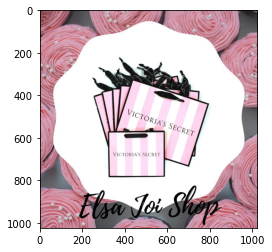

In [26]:
pyplot.imshow(data)

Counting the different shapes of the images:

In [27]:
shapes = []
for i in range(len(df)):
    data = image.imread('/Users/royyanovski/Desktop/DS Project - Product matching/train_images/' + df.loc[i, 'image'])
    shapes.append(data.shape)

In [33]:
total_no = len(df)
unique_posting_id = df['posting_id'].nunique
unique_image_phash = df['image_phash'].nunique
unique_title = df['title'].nunique
unique_label_group = df['label_group'].nunique

In [34]:
shapes_ser = pd.Series(shapes)
shapes_ser.nunique()

824

In [35]:
shapes_ser.value_counts().sort_values(ascending=False)[:20]

(640, 640, 3)      12259
(1024, 1024, 3)     6384
(800, 800, 3)       3916
(700, 700, 3)       2935
(1000, 1000, 3)     1540
(600, 600, 3)        503
(500, 500, 3)        502
(720, 720, 3)        480
(750, 750, 3)        205
(300, 300, 3)        203
(960, 960, 3)        187
(1001, 1001, 3)      181
(900, 900, 3)        166
(850, 850, 3)        103
(450, 450, 3)        101
(400, 400, 3)         94
(225, 225, 3)         91
(320, 320, 3)         77
(554, 554, 3)         71
(480, 480, 3)         54
dtype: int64

In [36]:
sum(shapes_ser.value_counts().sort_values(ascending=False)[:5])

27034

We 824 different image shapes. We will probably need to change it so that they all have the same size, by cropping and/or streching the images. The most common image shape is (640, 640, 3), and the 5 most common shapes make almost 80% of the samples. 

In [38]:
widths = []
lengths = []
dims = []
for shape in shapes:
    widths.append(shape[0])
    lengths.append(shape[1])
    dims.append(shape[2])

In [39]:
widths_ser = pd.Series(widths)
lengths_ser = pd.Series(lengths)
dims_ser = pd.Series(dims)

In [40]:
print(widths_ser.nunique())
print(lengths_ser.nunique())
print(dims_ser.nunique())

751
754
1


We can see that all the images are of RGB (shape of (? ,? , 3)) while all of our variation comes from the lengths and withs.

# Baseline calculation

In [41]:
print(f'The baseline accuracy by the largest class is: {51 / len(df):.5f}')

The baseline accuracy by the largest class is: 0.00149


Our baseline accuracy, by the largest class No. of samples divided by the total No. of samples.

# Titles basic classification model

#### Train Test Split

In [45]:
# Train Test Split

from sklearn.utils import shuffle

def split_data_by_group(df, features, target, id_to_split, train_size):
    """ returns train and test set divided by group 
    """
    
    df = shuffle(df)
    cum_sum = pd.DataFrame(df[id_to_split].value_counts().cumsum()/\
                           len(df))

    train_indexes = cum_sum[cum_sum[id_to_split] <= train_size].index.values
    test_indexes = cum_sum[cum_sum[id_to_split] > train_size].index.values

    X_train = df.loc[df[id_to_split].isin(train_indexes), features]
    X_test = df.loc[df[id_to_split].isin(test_indexes), features]

    y_train = df.loc[df[id_to_split].isin(train_indexes), target]
    y_test = df.loc[df[id_to_split].isin(test_indexes), target]
    
    return X_train, X_test, y_train, y_test

In [46]:
# train test split

id_to_split = 'label_group'
train_val_size = 0.8
train_size = 0.96
features = ['title', 'label_group']
id_to_split = 'label_group'
target = 'label_group'

# train-test split
X_train, X_test, y_train, y_test = split_data_by_group(df, features, target, id_to_split, train_val_size)

# train-validation split
X_train, X_val, y_train, y_val = split_data_by_group(X_train, features, target, id_to_split, train_size)


In [47]:
features = ['title']

In [48]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape,  X_test.shape, y_test.shape

((26304, 2), (1096, 2), (26304,), (1096,), (6850, 2), (6850,))

#### Preprocessing

In [49]:
# lowering and removing punctuations
import string

X_train['title'] = X_train['title'].replace(string.punctuation, '').str.lower()
X_val['title'] = X_val['title'].replace(string.punctuation, '').str.lower()
X_test['title'] = X_test['title'].replace(string.punctuation, '').str.lower()

#### Similarity

In [50]:
from difflib import SequenceMatcher

In [51]:
def similar(s1, s2):
    return SequenceMatcher(None, s1, s2).ratio()

In [53]:
same_similarity = []

gby_label = X_train.groupby('label_group')

for g in gby_label:
    group_df = g[1]
    for i in range(len(group_df) - 1):
        for j in range(i + 1, len(group_df)):
            sim = similar(group_df.iloc[i, 0], group_df.iloc[j, 0])
            same_similarity.append(sim)
            
same_similarity = pd.Series(same_similarity)

In [55]:
diff_similarity = []

for i in range(len(X_train)):
    j = np.random.randint(0, len(X_train))
    if y_train.iloc[i] != y_train.iloc[j]:
        sim = similar(X_train.iloc[i, 0], X_train.iloc[j, 0])
        diff_similarity.append(sim)

diff_similarity = pd.Series(diff_similarity)

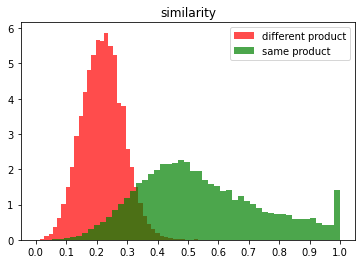

In [56]:
plt.hist(diff_similarity, density=True, bins = 50, color = 'r', alpha=0.7, label='different product')
plt.hist(same_similarity, density=True, bins = 50, color ='g', alpha=0.7, label='same product')

plt.legend()
plt.title('similarity')
plt.xticks(np.linspace(0,1,11));

#### Same product similarity stats

In [57]:
same_similarity.describe().round(2)

count    79778.00
mean         0.54
std          0.20
min          0.01
25%          0.39
50%          0.51
75%          0.67
max          1.00
dtype: float64

#### Different product similarity stats

In [58]:
diff_similarity.describe().round(2)

count    26299.00
mean         0.22
std          0.07
min          0.00
25%          0.17
50%          0.22
75%          0.26
max          0.70
dtype: float64

#### Choosing threshold:
- The data is very imblanced the proportion of same product to not same product is ~ 1 to 20k.
- We will choose a threshold that takes into consideration the prior probabilities.
- **calculate maximum likelihood**

In [59]:
diff_similarity.quantile(0.9999)

0.5590187192117747

#### Preparing True Matches (y_true)

In [62]:
# preparing true matches

def get_matches(y, grouped_data):
    """ returns list of all matches by item
    """
    
    matches = []
    for i in range(len(y)):
        g = y.iloc[i]
        labels = list(grouped_data.get_group(g).index)
        matches.append(labels)
    
    return matches

In [63]:
grouped_train = X_train.groupby('label_group')
grouped_val = X_val.groupby('label_group')
grouped_test = X_test.groupby('label_group')

matches_train = get_matches(y_train, grouped_train)
matches_val = get_matches(y_val, grouped_val)
matches_test = get_matches(y_test, grouped_test)

#### Predicting on validation

In [66]:
def get_predictions(X, thresh):
    """returns predictions for given data and threshold
    """
    
    idx = X.index
    
    pred = [[idx[i]] for i in range(len(X))]


    for i in range(len(X)):
    
        for j in range(i + 1, len(X)):
            
            sim = similar(X.iloc[i,0], X.iloc[j,0])
            
            if sim >= thresh:
                pred[i].append(idx[j])
                pred[j].append(idx[i])
    
    return pred

In [68]:
thresholds = [0.5]
preds = []

for thresh in thresholds:
    pred = get_predictions(X_val, thresh)
    preds.append(pred)

In [69]:
def get_f1_score(pred, y_true):
    """returns mean F1 score. The mean is calculated in a sample-wise fashion, 
        meaning that an F1 score is calculated for every predicted row, then averaged.
    """
    
    f1_scores = []
    
    for i in range(len(pred)):
        
        p = pred[i]
        p_true = y_true[i]
        
        tp = len(set(p) & set(p_true)) - 1
        fp = len(np.setdiff1d(p, p_true))
        fn = len(np.setdiff1d(p_true, p))
        
        f1 = tp / (tp + 0.5*(fp + fn))
        
        f1_scores.append(f1)

    return sum(f1_scores) / len(f1_scores) , f1_scores
    

In [70]:
for pred in preds:
    mean_f1 , f1_scores = get_f1_score(pred, matches_val)
    print(mean_f1)

0.5525163654269494
